# Analyse survey

## Imports

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 16 13:02:17 2018

@author: macchini
"""

import os,sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import my_plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import utils

from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal

from collections import Counter

## Load file and create dataframe

In [3]:
folder = './Data'

csv = 'Bidirectional Interface - learning.csv'

In [4]:
answers_df = pd.read_csv(os.path.join(folder, csv))

answers_df_sim = answers_df.iloc[[8,9,10,11,12,17,18,19,20,21]]
answers_df_sim

answers_df_hw = answers_df.iloc[[13,14,15,16]]
answers_df_sim

,Horodateur,Age,Gender,How experienced are you with the use of remote controllers?,How experienced are you with the use of remote controllers for controlling drones?,Which interface was easier to use in the FIRST run?,Which interface was easier to use in the LAST run?,Which interface did you prefer?,Why?,Please give your personal feedback/impressions
8,2019/08/07 6:02:22 PM UTC+2,29,Female,9,5,Equivalent,Wearable,Werable,"more fun, more intuitive (I did not have to th...",I think that the gain of the wearable can be t...
9,2019/08/08 11:07:35 AM UTC+2,30,Male,8,7,Wearable,Wearable,Werable,The joystick had a mapping of the inputs/outpu...,"In my opinion, the main problem related to the..."
10,2019/08/08 2:43:16 PM UTC+2,24,Female,2,1,Wearable,Wearable,Werable,Was easy to use,Nice
11,2019/08/08 3:25:25 PM UTC+2,21,Male,10,1,Remote controller,Remote controller,Remote controller,I have much more experience with the remote co...,"in the experiment, give more feedback about pa..."
12,2019/08/08 3:51:25 PM UTC+2,30,Male,10,7,Wearable,Wearable,Werable,I had an easier time understanding the control...,I never got the hang of the controller.
17,2019/08/28 10:36:38 AM UTC+2,28,Male,8,9,Remote controller,Wearable,Werable,Because with the wearable you could make much ...,I found the task easier with multiple tries an...
18,2019/08/28 12:53:38 PM UTC+2,31,Male,5,1,Remote controller,Wearable,Werable,It seemed to be more natural after a while,I prefer the wearable but it needs some effort...
19,2019/08/28 2:28:56 PM UTC+2,25,Female,5,1,Wearable,Wearable,Werable,It's easier to use it and to learn. The moveme...,The test starts on the right and my impression...
20,2019/08/28 3:02:28 PM UTC+2,24,Male,10,3,Remote controller,Equivalent,Werable,Wearable is much more fun to use,Wearable seemed more precise and definitely mo...
21,2019/08/28 4:23:22 PM UTC+2,24,Male,7,1,Wearable,Wearable,Werable,more intuitive and more fun,the controller had some inertia that took some...


## Separate questions

In [5]:
data_sim = {}
data_hw = {}


age = 'Age'
gender = 'Gender'
experience_controller = 'How experienced are you with the use of remote controllers?'
experience_controller_drone = 'How experienced are you with the use of remote controllers for controlling drones?'
easier_first = 'Which interface was easier to use in the FIRST run?'
easier_last = 'Which interface was easier to use in the LAST run?'
prefered = 'Which interface did you prefer?'

questions = [age, gender, experience_controller, experience_controller_drone, easier_first, easier_last, prefered]

for q in questions:
    data_sim[q] = answers_df_sim[q].values
for q in questions:
    data_hw[q] = answers_df_hw[q].values

## Compute mean and average

In [6]:
def compute_stats(data):

    stats = {}

    mean_index = 0
    std_index = 1

    for q in [age, experience_controller, experience_controller_drone]:
        stats[q] = [0, 0]
        stats[q][mean_index] = np.mean(data[q])
        stats[q][std_index] = np.std(data[q])

    print(stats)
    return stats

stats_sim = compute_stats(data_sim)
stats_hw = compute_stats(data_hw)

{'Age': [26.6, 3.2310988842807027], 'How experienced are you with the use of remote controllers?': [7.4, 2.5377155080899043], 'How experienced are you with the use of remote controllers for controlling drones?': [3.6, 2.973213749463701]}
{'Age': [28.25, 3.766629793329841], 'How experienced are you with the use of remote controllers?': [6.75, 2.384848003542364], 'How experienced are you with the use of remote controllers for controlling drones?': [4.25, 3.491060010942235]}


## Results

Stats (similarly for stats_hw for the hardware experiments) is a nested dictionnary containing the mean and std for each question of the survey, separated depending on the interface (remote or motion) and run (first or last)

data (similarly data_hw) can be used to create boxplot for the distribution of answers.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a19c74e90>,
 'caps': [<matplotlib.lines.Line2D at 0x1a19c79450>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a19c74290>],
 'medians': [<matplotlib.lines.Line2D at 0x1a19c66050>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a19c81390>],
 'means': []}

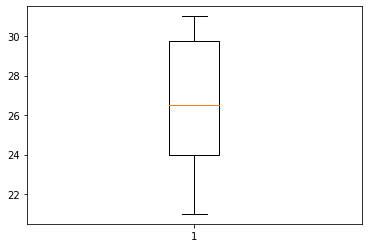

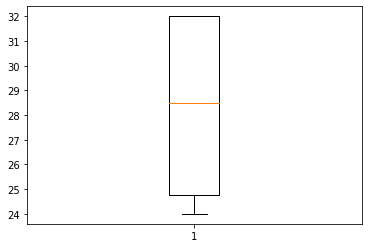

In [7]:
plt.boxplot(data_sim[age])

plt.figure()
plt.boxplot(data_hw[age])

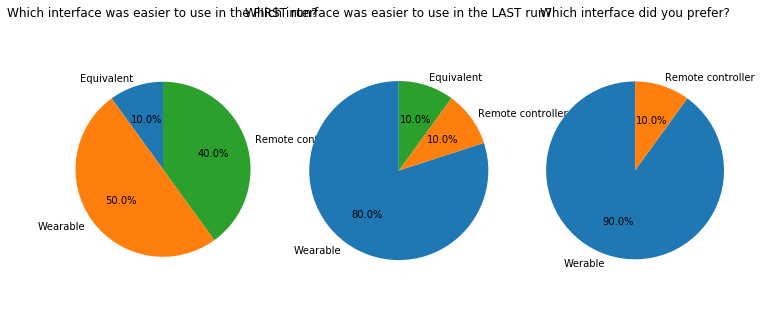

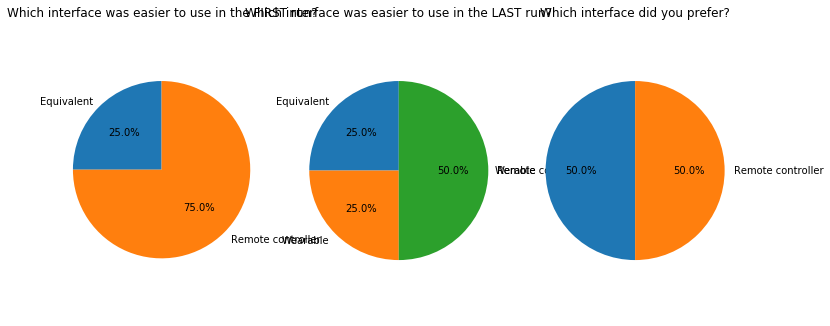

In [10]:
def plot_pies(data):
    
    plt.figure(figsize = (12,12))

    gender_pie_data = Counter(data[gender])
    easier_first_pie_data = Counter(data[easier_first])
    easier_last_pie_data = Counter(data[easier_last])
    prefered_pie_data = Counter(data[prefered])

#     ax1 = plt.subplot(221)
#     ax1.pie(gender_pie_data.values(), labels=gender_pie_data.keys(), autopct='%1.1f%%', startangle=90)
#     ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#     ax1.set_title(gender)

    ax1 = plt.subplot(231)
    ax1.pie(easier_first_pie_data.values(), labels=easier_first_pie_data.keys(), autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(easier_first)

    ax1 = plt.subplot(232)
    ax1.pie(easier_last_pie_data.values(), labels=easier_last_pie_data.keys(), autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(easier_last)

    ax1 = plt.subplot(233)
    ax1.pie(prefered_pie_data.values(), labels=prefered_pie_data.keys(), autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(prefered)

    plt.show()
    
plot_pies(data_sim)
plot_pies(data_hw)